In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)



---



In [ ]:
import json
import pandas as pd

In [ ]:
json_path = "/data/train_combined.json"

with open(json_path, encoding="utf-8") as f:
    data = json.load(f)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

filename gender  age isProf  \
0  6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63...      남   30    일반인   
1  65rsfe402042f34319e10128c1ab9614e2f967690a64a0...      남   40    전문인   
2  b1cbe34734870cc11c33334e02bea93ac3a3b061caab62...      여   20    전문인   
3  llfycc0aa29599cc63cace3610fdaaad3a99aab2ee38c9...      여   50    일반인   
4  3hww73b70615461a7336d0383b53582f8bf804f6e0f30d...      여   30    일반인   

  faceExp_uploader        bg_uploader  \
0               분노  교통/이동수단(엘리베이터 포함)   
1               분노          문화재 및 유적지   
2               분노            오락/공연시설   
3               분노       공공시설/종교/의료시설   
4               분노         상업시설/점포/시장   

                                             annot_A  \
0  {'boxes': {'maxX': 2073.2546049999996, 'maxY':...   
1  {'boxes': {'maxX': 2889.526926369863, 'maxY': ...   
2  {'boxes': {'maxX': 1950.3801187037307, 'maxY':...   
3  {'boxes': {'maxX': 849.4007, 'maxY': 1153.1373...   
4  {'boxes': {'maxX': 1402.8889, 'maxY': 1383.816...   

                                             annot_B  \
0  {'boxes': {'maxX': 2074.6636049999997, 'maxY':...   
1  {'boxes': {'maxX': 2875.110463896304, 'maxY': ...   
2  {'boxes': {'maxX': 2036.4635129993103, 'maxY':...   
3  {'boxes': {'maxX': 868.2845309560165, 'maxY': ...   
4  {'boxes': {'maxX': 1405.7005764318, 'maxY': 13...   

                                             annot_C emotion  
0  {'boxes': {'maxX': 2072.188605, 'maxY': 1487.9...   anger  
1  {'boxes': {'maxX': 2902.7341, 'maxY': 2300.207...   anger  
2  {'boxes': {'maxX': 1953.1189999999997, 'maxY':...   anger  
3  {'boxes': {'maxX': 849.4007, 'maxY': 1153.1373...   anger  
4  {'boxes': {'maxX': 1402.8889, 'maxY': 1383.816...   anger

In [ ]:
df.columns

Index(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader',
       'bg_uploader', 'annot_A', 'annot_B', 'annot_C', 'emotion'],
      dtype='object')

## **결측치 확인**

In [ ]:
df.isnull().sum()

filename            0
gender              0
age                 0
isProf              0
faceExp_uploader    0
bg_uploader         0
annot_A             0
annot_B             0
annot_C             0
emotion             0
dtype: int64



---



## **성별 분포 확인(Json)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

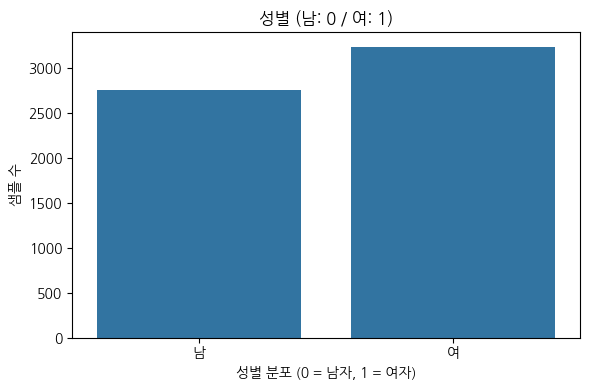

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title("성별 (남: 0 / 여: 1)")
plt.xlabel("성별 분포 (0 = 남자, 1 = 여자)")
plt.ylabel("샘플 수")
plt.tight_layout()
plt.show()

In [ ]:
print(" 성별 숫자 집계")
print(df['gender'].value_counts())

 성별 숫자 집계
gender
여    3236
남    2758
Name: count, dtype: int64


## **나이 분포 확인(Json)**

In [ ]:
def map_age_to_group(age):
    return f"{(age // 10) * 10}대"

df['age_group'] = df['age'].apply(map_age_to_group)
df['age_group'].value_counts()

age_group
20대    3074
30대    1980
40대     697
50대     164
10대      74
60대       5
Name: count, dtype: int64

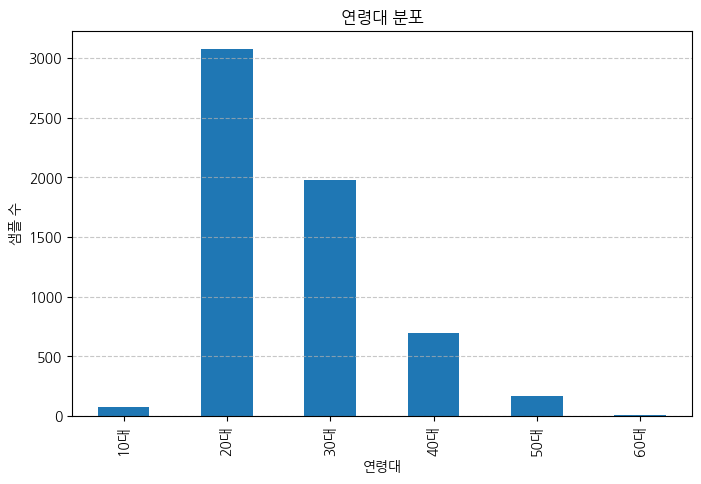

In [ ]:
plt.figure(figsize=(8, 5))
df['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title("연령대 분포")
plt.xlabel("연령대")
plt.ylabel("샘플 수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

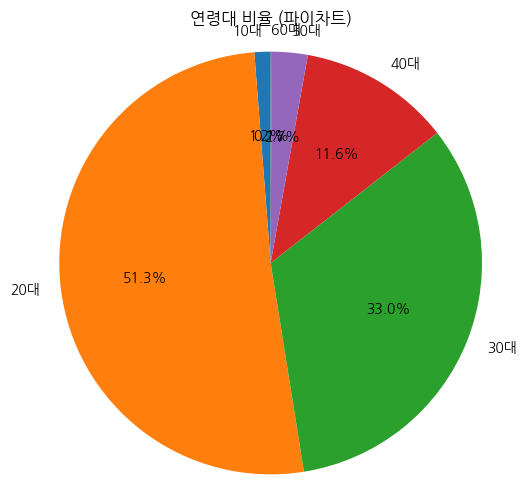

In [ ]:
age_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("연령대 비율 (파이차트)")
plt.axis('equal')
plt.show()

## **감정 종류 확인(Json)**

In [ ]:
df['emotion'].value_counts()

emotion
anger      1500
panic      1500
sadness    1500
happy      1494
Name: count, dtype: int64

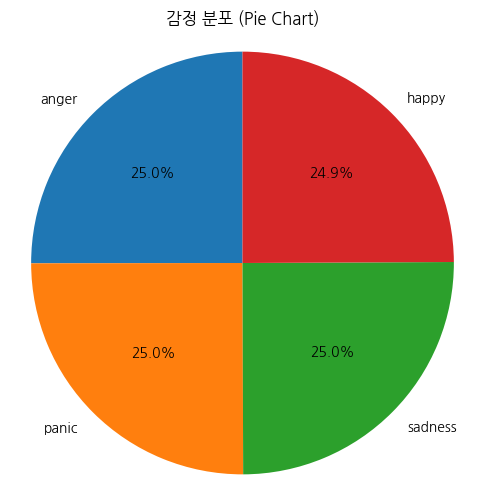

In [ ]:
emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("감정 분포 (Pie Chart)")
plt.axis('equal')
plt.show()

## **성별+연령 분포 확인(Json)**


In [ ]:
df[['age', 'gender']].head()

age gender
0   30      남
1   40      남
2   20      여
3   50      여
4   30      여

In [ ]:
df['age_group'] = (df['age'] // 10 * 10).astype(int).astype(str) + "대"
df['gender_age_group'] = df['age_group'] + " " + df['gender']

In [ ]:
print(df['gender_age_group'].value_counts())  # 값별 개수 확인

gender_age_group
20대 여    1727
20대 남    1347
30대 남     995
30대 여     985
40대 여     356
40대 남     341
50대 여     106
50대 남      58
10대 여      57
10대 남      17
60대 여       5
Name: count, dtype: int64


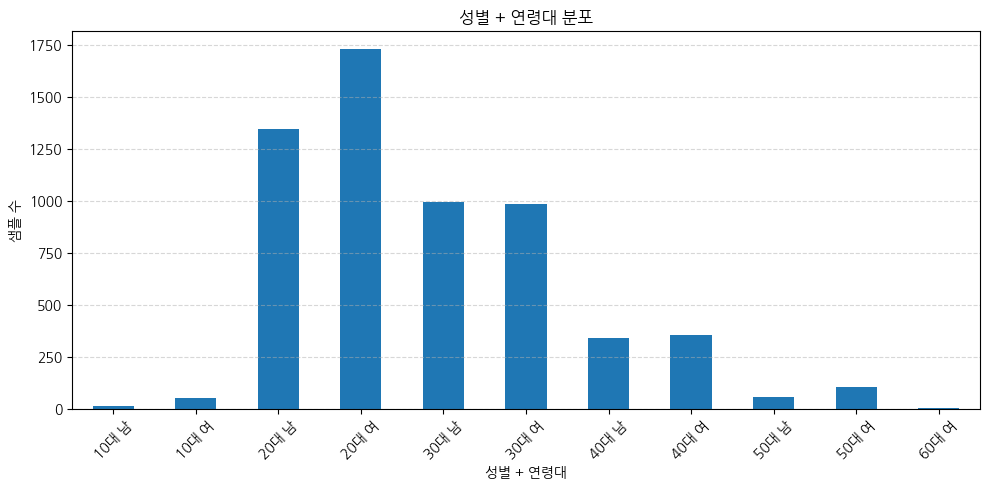

In [ ]:
plt.figure(figsize=(10, 5))
df['gender_age_group'].value_counts().sort_index().plot(kind='bar')
plt.title("성별 + 연령대 분포")
plt.xlabel("성별 + 연령대")
plt.ylabel("샘플 수")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **감정+성별 분포 확인(Json)**

<Figure size 1000x500 with 0 Axes>

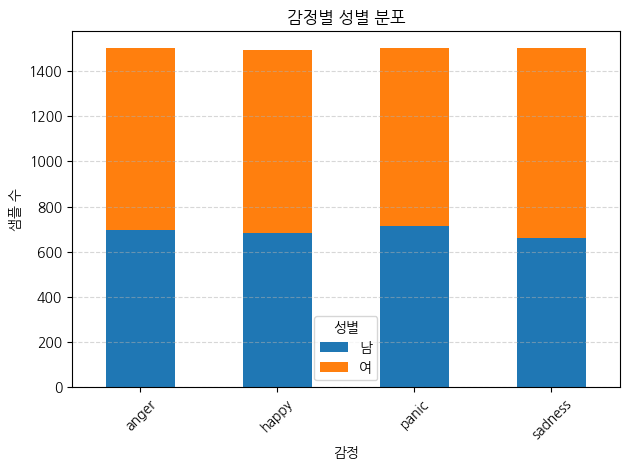

In [ ]:
plt.figure(figsize=(10, 5))
emotion_gender = df.groupby(['emotion', 'gender']).size().unstack().fillna(0)
emotion_gender.plot(kind='bar', stacked=True)
plt.title("감정별 성별 분포")
plt.xlabel("감정")
plt.ylabel("샘플 수")
plt.xticks(rotation=45)
plt.legend(title="성별")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

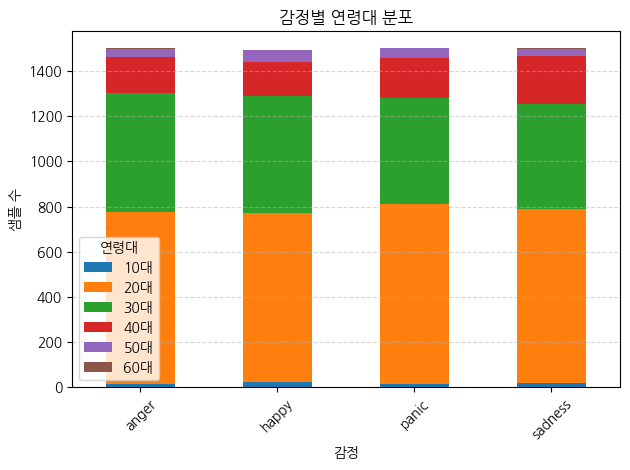

In [ ]:
plt.figure(figsize=(10, 5))
emotion_age = df.groupby(['emotion', 'age_group']).size().unstack().fillna(0)
emotion_age.plot(kind='bar', stacked=True)
plt.title("감정별 연령대 분포")
plt.xlabel("감정")
plt.ylabel("샘플 수")
plt.xticks(rotation=45)
plt.legend(title="연령대")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 성별 + 연령대 조합 컬럼 생성 (예: 20대_남, 30대_여)
df['gender_age_group'] = df['age_group'] + '_' + df['gender']

# 감정 vs (성별+연령대) 교차표 만들기
pivot_df = df.groupby(['emotion', 'gender_age_group']).size().unstack().fillna(0)

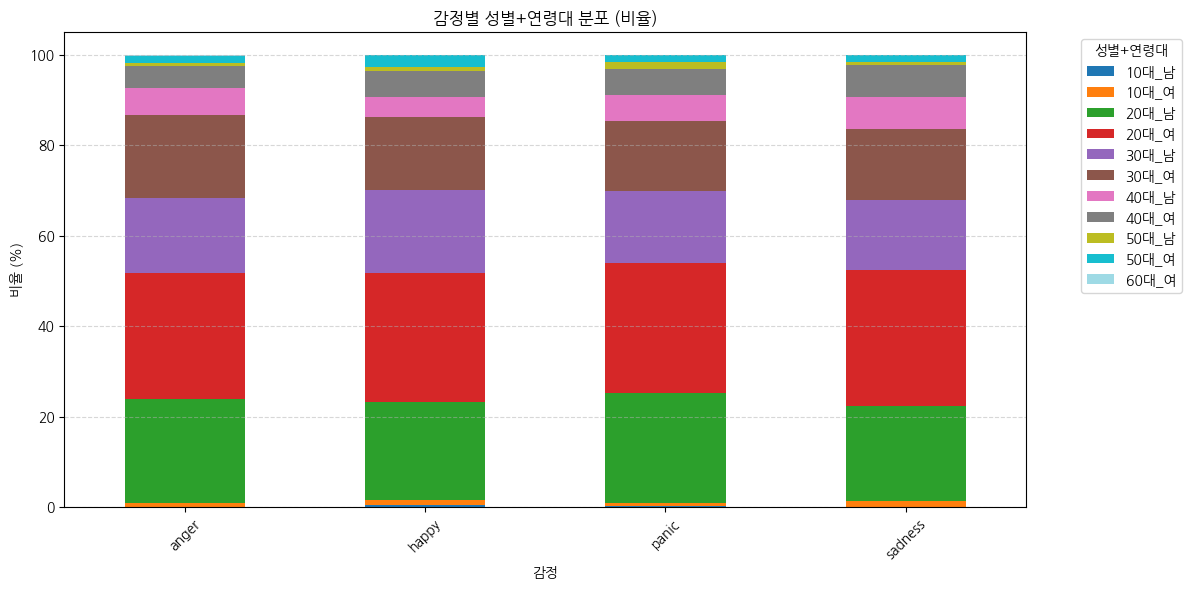

In [ ]:
# 비율로 바꾸기 (% 단위)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("감정별 성별+연령대 분포 (비율)")
plt.xlabel("감정")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.legend(title="성별+연령대", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

source_root = "/content/drive/MyDrive/img/train"
target_root = "/content/train_combined"

os.makedirs(target_root, exist_ok=True)

# 감정별 폴더 순회
for emotion in ["anger", "happy", "panic", "sadness"]:
    emotion_path = os.path.join(source_root, emotion)
    for fname in os.listdir(emotion_path):
        src = os.path.join(emotion_path, fname)

        # 파일 이름에 감정 라벨을 붙여서 저장 (예: anger_0001.jpg)
        dst_name = f"{emotion}_{fname}"
        dst = os.path.join(target_root, dst_name)

        shutil.copyfile(src, dst)

## **이미지 해상도 비교/확인**

      해상도 (W, H)   갯수
13  (3088, 2320)  790
9   (2944, 2208)  695
10  (4032, 3024)  490
2   (3264, 2448)  433
0   (3088, 2316)  403
16  (3264, 1836)  302
1   (4032, 2268)  245
22  (2640, 1980)  243
15  (3216, 1808)  221
3   (3088, 1737)  183


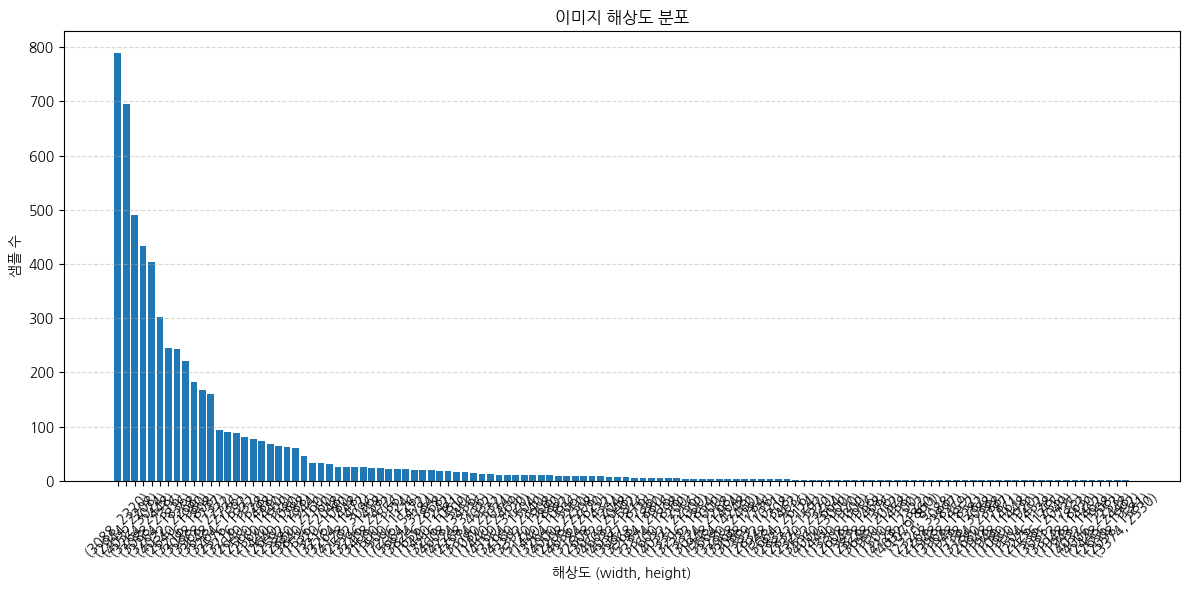

In [ ]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 이미지가 저장된 폴더 경로
image_dir = "/content/train_combined"

# 해상도 정보 수집
size_list = []

for fname in os.listdir(image_dir):
    if fname.endswith(".jpg") or fname.endswith(".png"):
        try:
            img = Image.open(os.path.join(image_dir, fname))
            size_list.append(img.size)  # (width, height)
        except Exception as e:
            print(f"오류 발생: {fname} - {e}")

# 해상도 분포 확인
size_counter = Counter(size_list)
df_sizes = pd.DataFrame(size_counter.items(), columns=["해상도 (W, H)", "갯수"]).sort_values(by="갯수", ascending=False)

# 출력
print(df_sizes.head(10))  # 가장 많이 나온 해상도 10개

# 시각화
plt.figure(figsize=(12, 6))
plt.bar([str(k) for k in df_sizes["해상도 (W, H)"]], df_sizes["갯수"])
plt.xticks(rotation=45)
plt.title("이미지 해상도 분포")
plt.xlabel("해상도 (width, height)")
plt.ylabel("샘플 수")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **- 밝기 / 채도 / 색상 평균**
    
    → 감정,나이,성별로 시각적 특성이 있는지 분석

In [ ]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt
import cv2

# 이미지 디렉토리
image_dir = "/content/train_combined"

# JSON 또는 정리된 메타 정보 파일 불러오기
df = pd.read_json("/content/train_combined.json")  # 또는 JSONDataset에서 추출한 DataFrame

# 이미지 경로 열 추가
df["filepath"] = df.apply(lambda row: os.path.join(image_dir, f"{row['emotion']}_{row['filename']}"), axis=1)

# 밝기, 채도, 색상 컬럼 생성
h_list, s_list, v_list = [], [], []

for path in tqdm(df["filepath"]):
    try:
        img = cv2.imread(path)
        if img is None:
            h_list.append(np.nan)
            s_list.append(np.nan)
            v_list.append(np.nan)
            continue

        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        h_list.append(np.mean(h))
        s_list.append(np.mean(s))
        v_list.append(np.mean(v))

    except Exception as e:
        print(f"오류: {path}, {e}")
        h_list.append(np.nan)
        s_list.append(np.nan)
        v_list.append(np.nan)

df["mean_hue"] = h_list
df["mean_saturation"] = s_list
df["mean_value"] = v_list

100%|██████████| 5994/5994 [13:51<00:00,  7.21it/s]


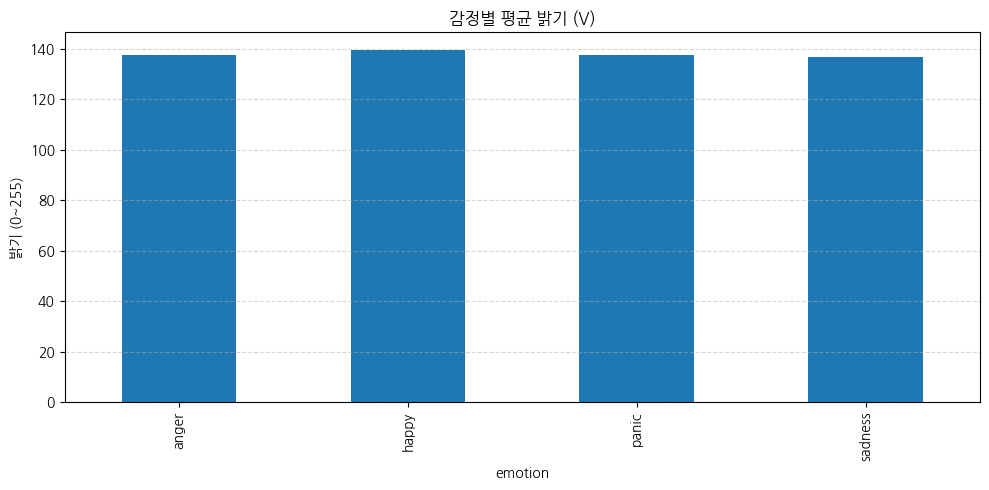

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("emotion")["mean_value"].mean().plot(kind='bar')
plt.title("감정별 평균 밝기 (V)")
plt.ylabel("밝기 (0~255)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader',
       'bg_uploader', 'annot_A', 'annot_B', 'annot_C', 'emotion', 'filepath',
       'mean_hue', 'mean_saturation', 'mean_value'],
      dtype='object')


In [ ]:
def get_age_group(age):
    if pd.isnull(age):
        return np.nan
    age = int(age)
    if age < 20:
        return "10대"
    elif age < 30:
        return "20대"
    elif age < 40:
        return "30대"
    elif age < 50:
        return "40대"
    elif age < 60:
        return "50대"
    else:
        return "60대"

df["age_group"] = df["age"].apply(get_age_group)

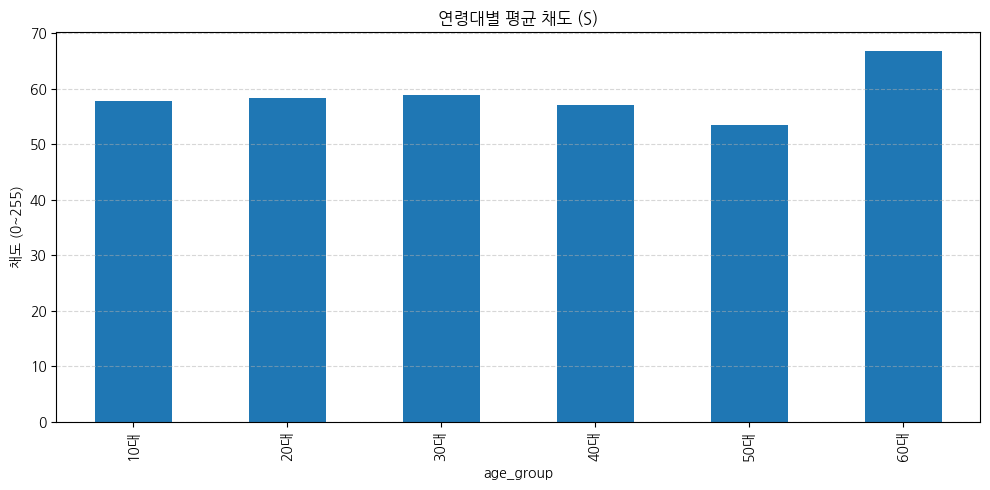

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("age_group")["mean_saturation"].mean().plot(kind='bar')
plt.title("연령대별 평균 채도 (S)")
plt.ylabel("채도 (0~255)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **불량 이미지 탐색**

In [ ]:
# 열리지 않았던 이미지 목록 추출
unreadable_images = df[df["mean_value"].isna()][["filename", "filepath"]]
print("열리지 않는 이미지 수:", len(unreadable_images))
display(unreadable_images.head())

열리지 않는 이미지 수: 0


Empty DataFrame
Columns: [filename, filepath]
Index: []

**가로가 긴 얼굴 이미지”를 비정상적인 회전 또는 잘못된 비율로 판단**

In [ ]:
#회전된(90도 틀어진) 이미지 탐지 (비정상적인 종횡비 확인)
from PIL import Image

rotated_images = []

for path in tqdm(df["filepath"]):
    try:
        with Image.open(path) as img:
            width, height = img.size
            if width > height:  # 가로가 긴 경우 비정상 가능성
                rotated_images.append(path)
    except:
        continue

print("회전된(가로로 긴) 이미지 수:", len(rotated_images))
for path in rotated_images[:5]:
    print(path)

100%|██████████| 5994/5994 [00:01<00:00, 4147.04it/s]

회전된(가로로 긴) 이미지 수: 5897
/content/train_combined/anger_6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63ec1162f5f6bfc6e481l.jpg
/content/train_combined/anger_65rsfe402042f34319e10128c1ab9614e2f967690a64a0016f2c49ff33fe7sy3z.jpg
/content/train_combined/anger_b1cbe34734870cc11c33334e02bea93ac3a3b061caab62c0df1c6b9c75430tquz.jpg
/content/train_combined/anger_llfycc0aa29599cc63cace3610fdaaad3a99aab2ee38c9edb6c10966765bbwd5f.jpg
/content/train_combined/anger_3hww73b70615461a7336d0383b53582f8bf804f6e0f30d64f36fb410038b82m2u.jpg


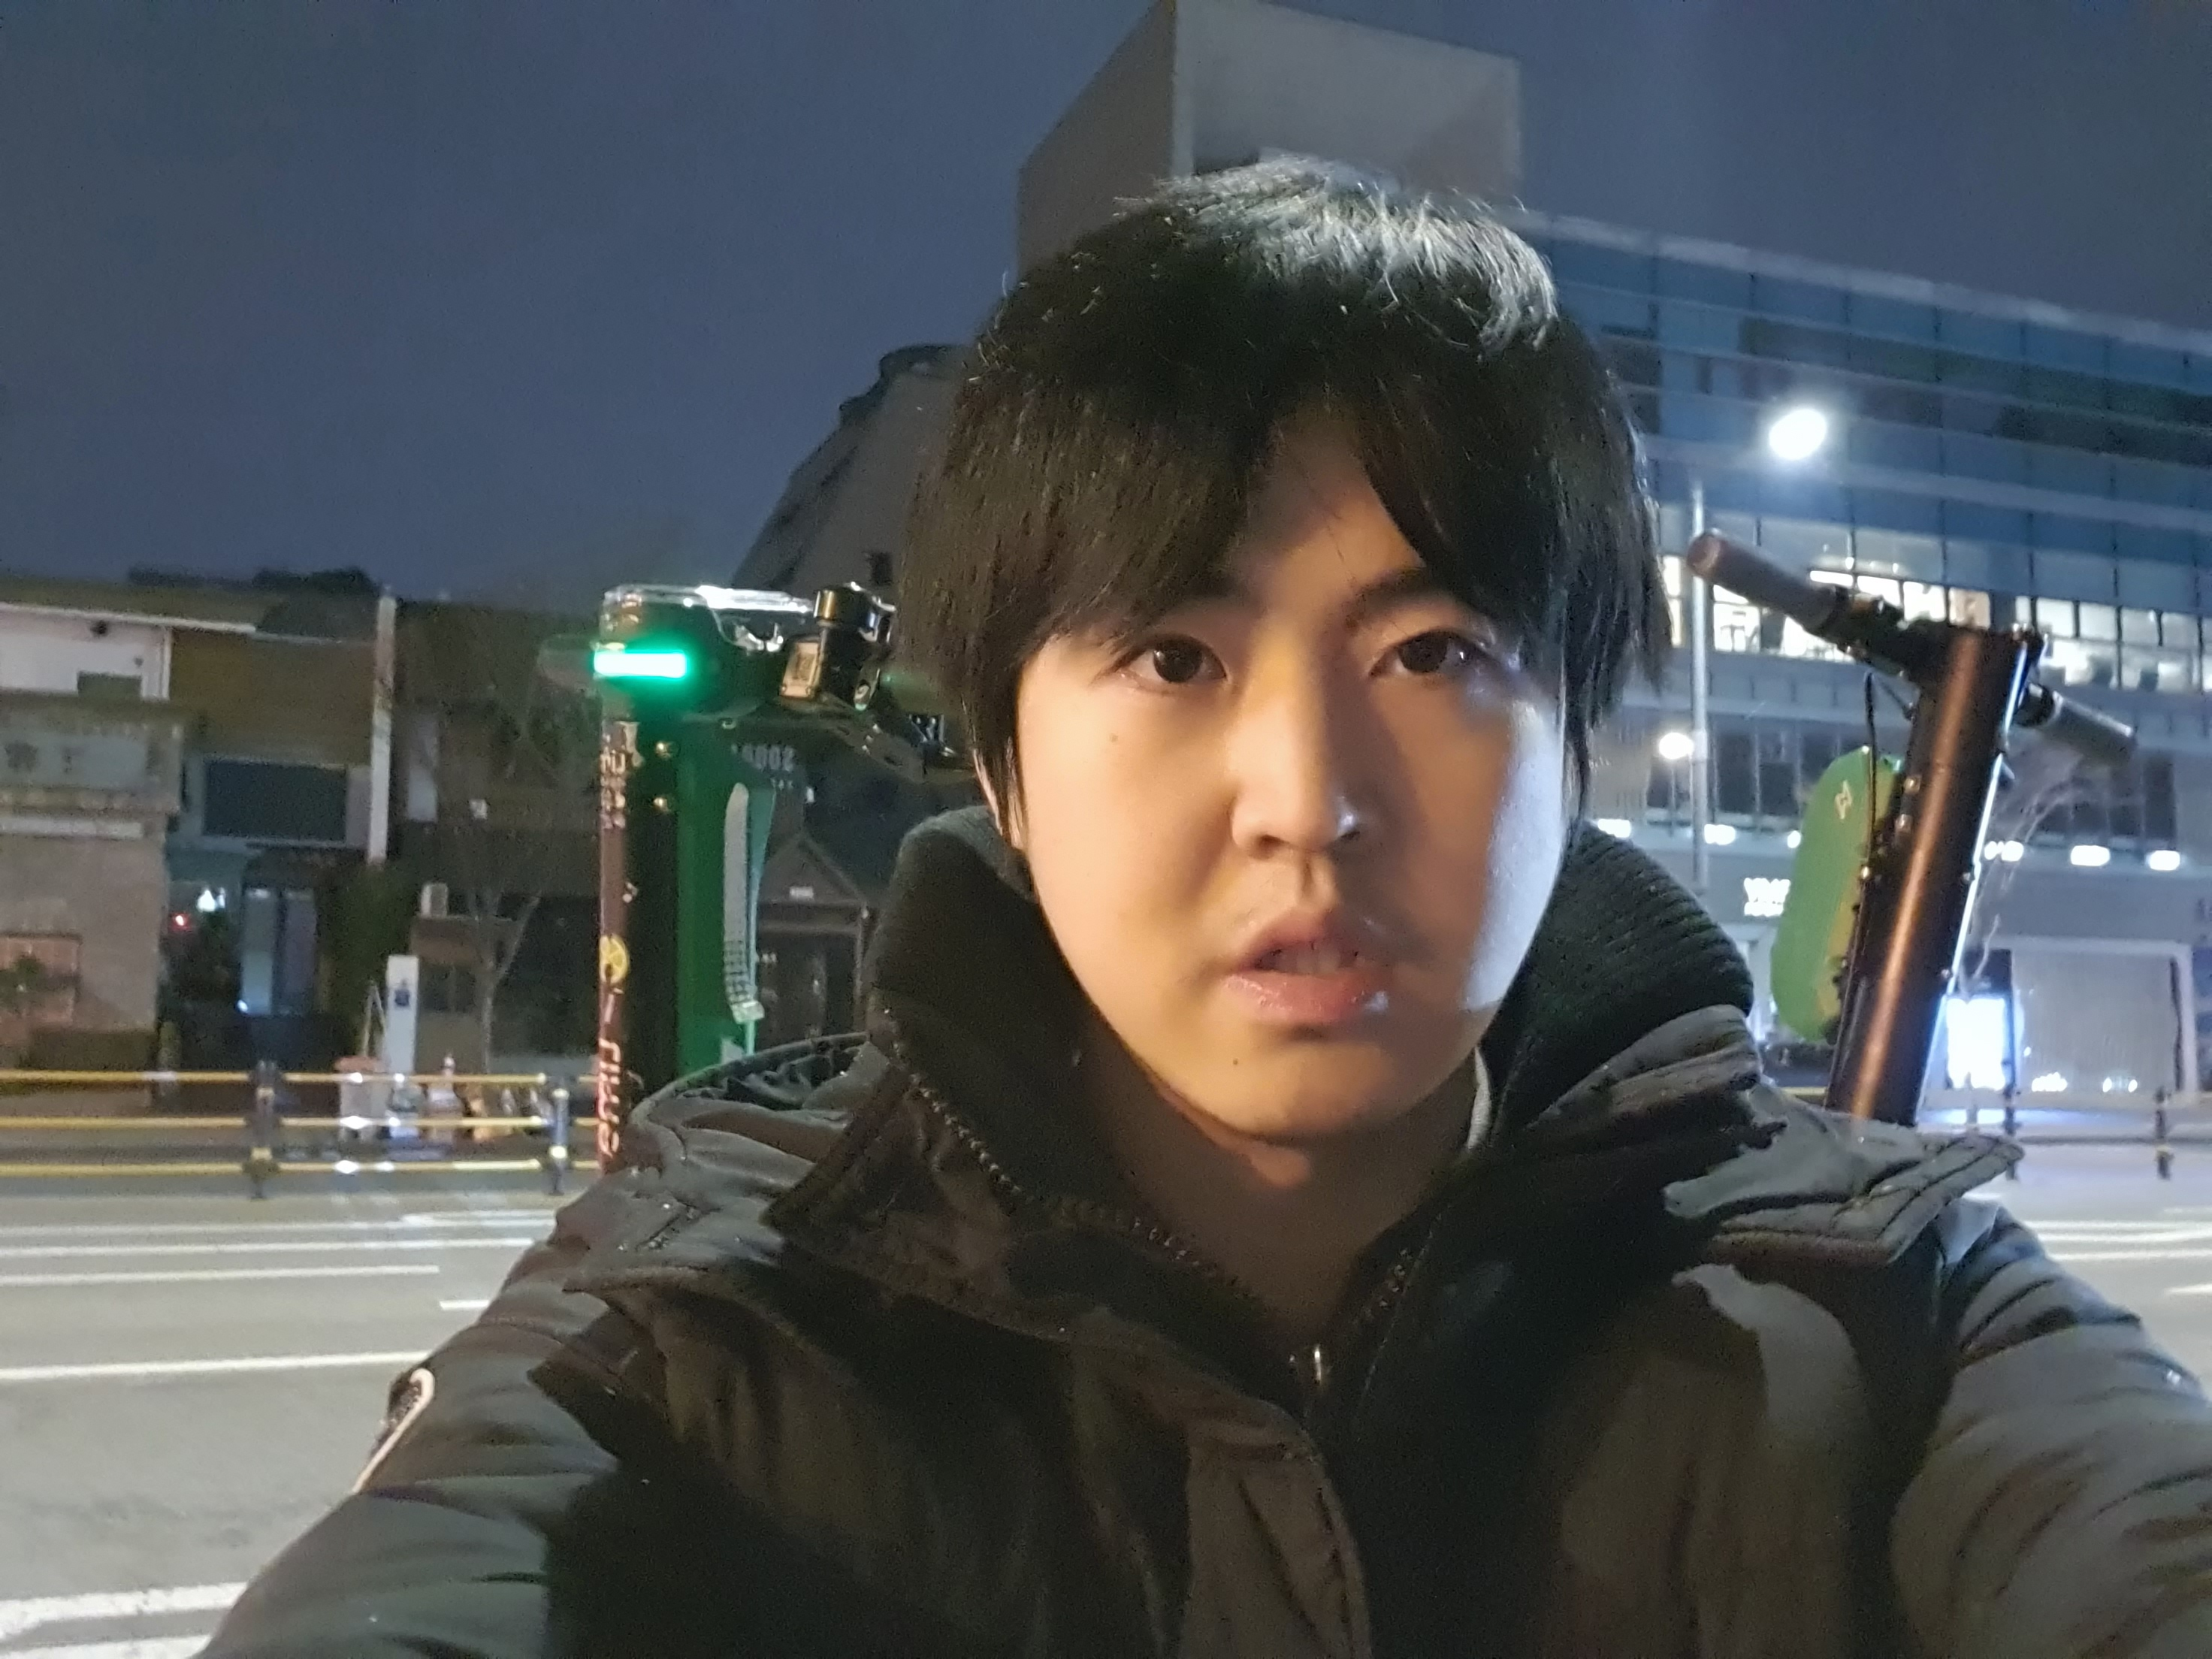

In [ ]:
from IPython.display import Image, display

img_path = "/content/train_combined/anger_6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63ec1162f5f6bfc6e481l.jpg"
display(Image(filename=img_path))

In [ ]:
img_path = "/content/train_combined/anger_65rsfe402042f34319e10128c1ab9614e2f967690a64a0016f2c49ff33fe7sy3z.jpg"
display(Image(filename=img_path))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img_path = "/content/train_combined/anger_b1cbe34734870cc11c33334e02bea93ac3a3b061caab62c0df1c6b9c75430tquz.jpg"
display(Image(filename=img_path))

Output hidden; open in https://colab.research.google.com to view.

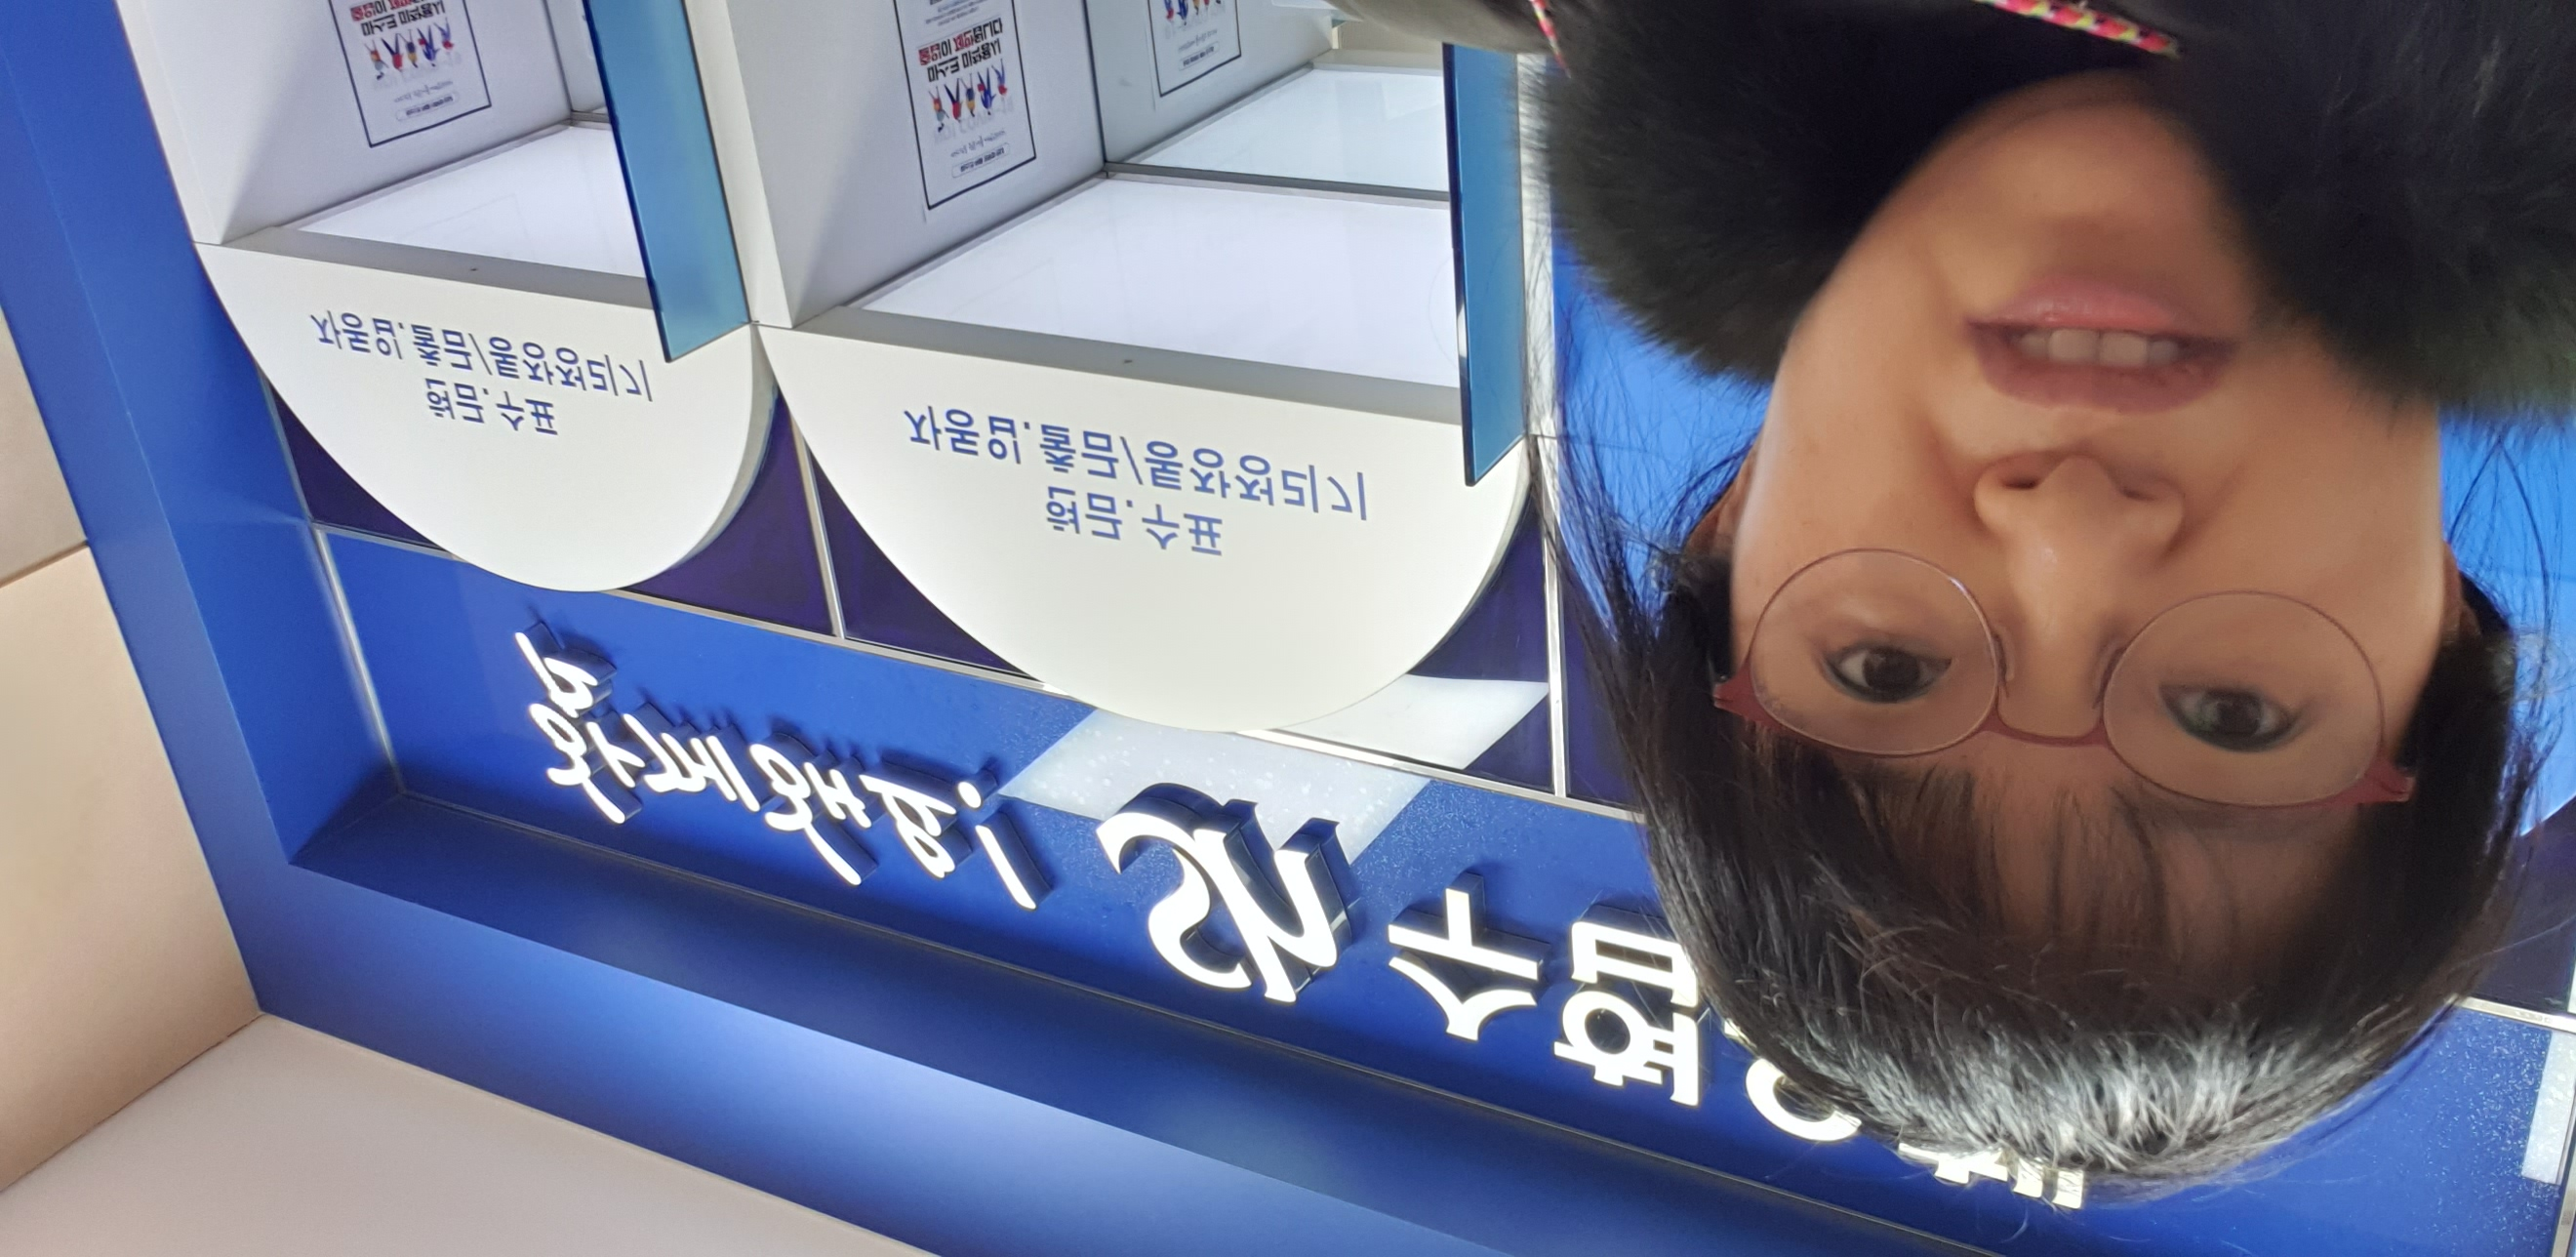

In [ ]:
img_path = "/content/train_combined/anger_llfycc0aa29599cc63cace3610fdaaad3a99aab2ee38c9edb6c10966765bbwd5f.jpg"
display(Image(filename=img_path))

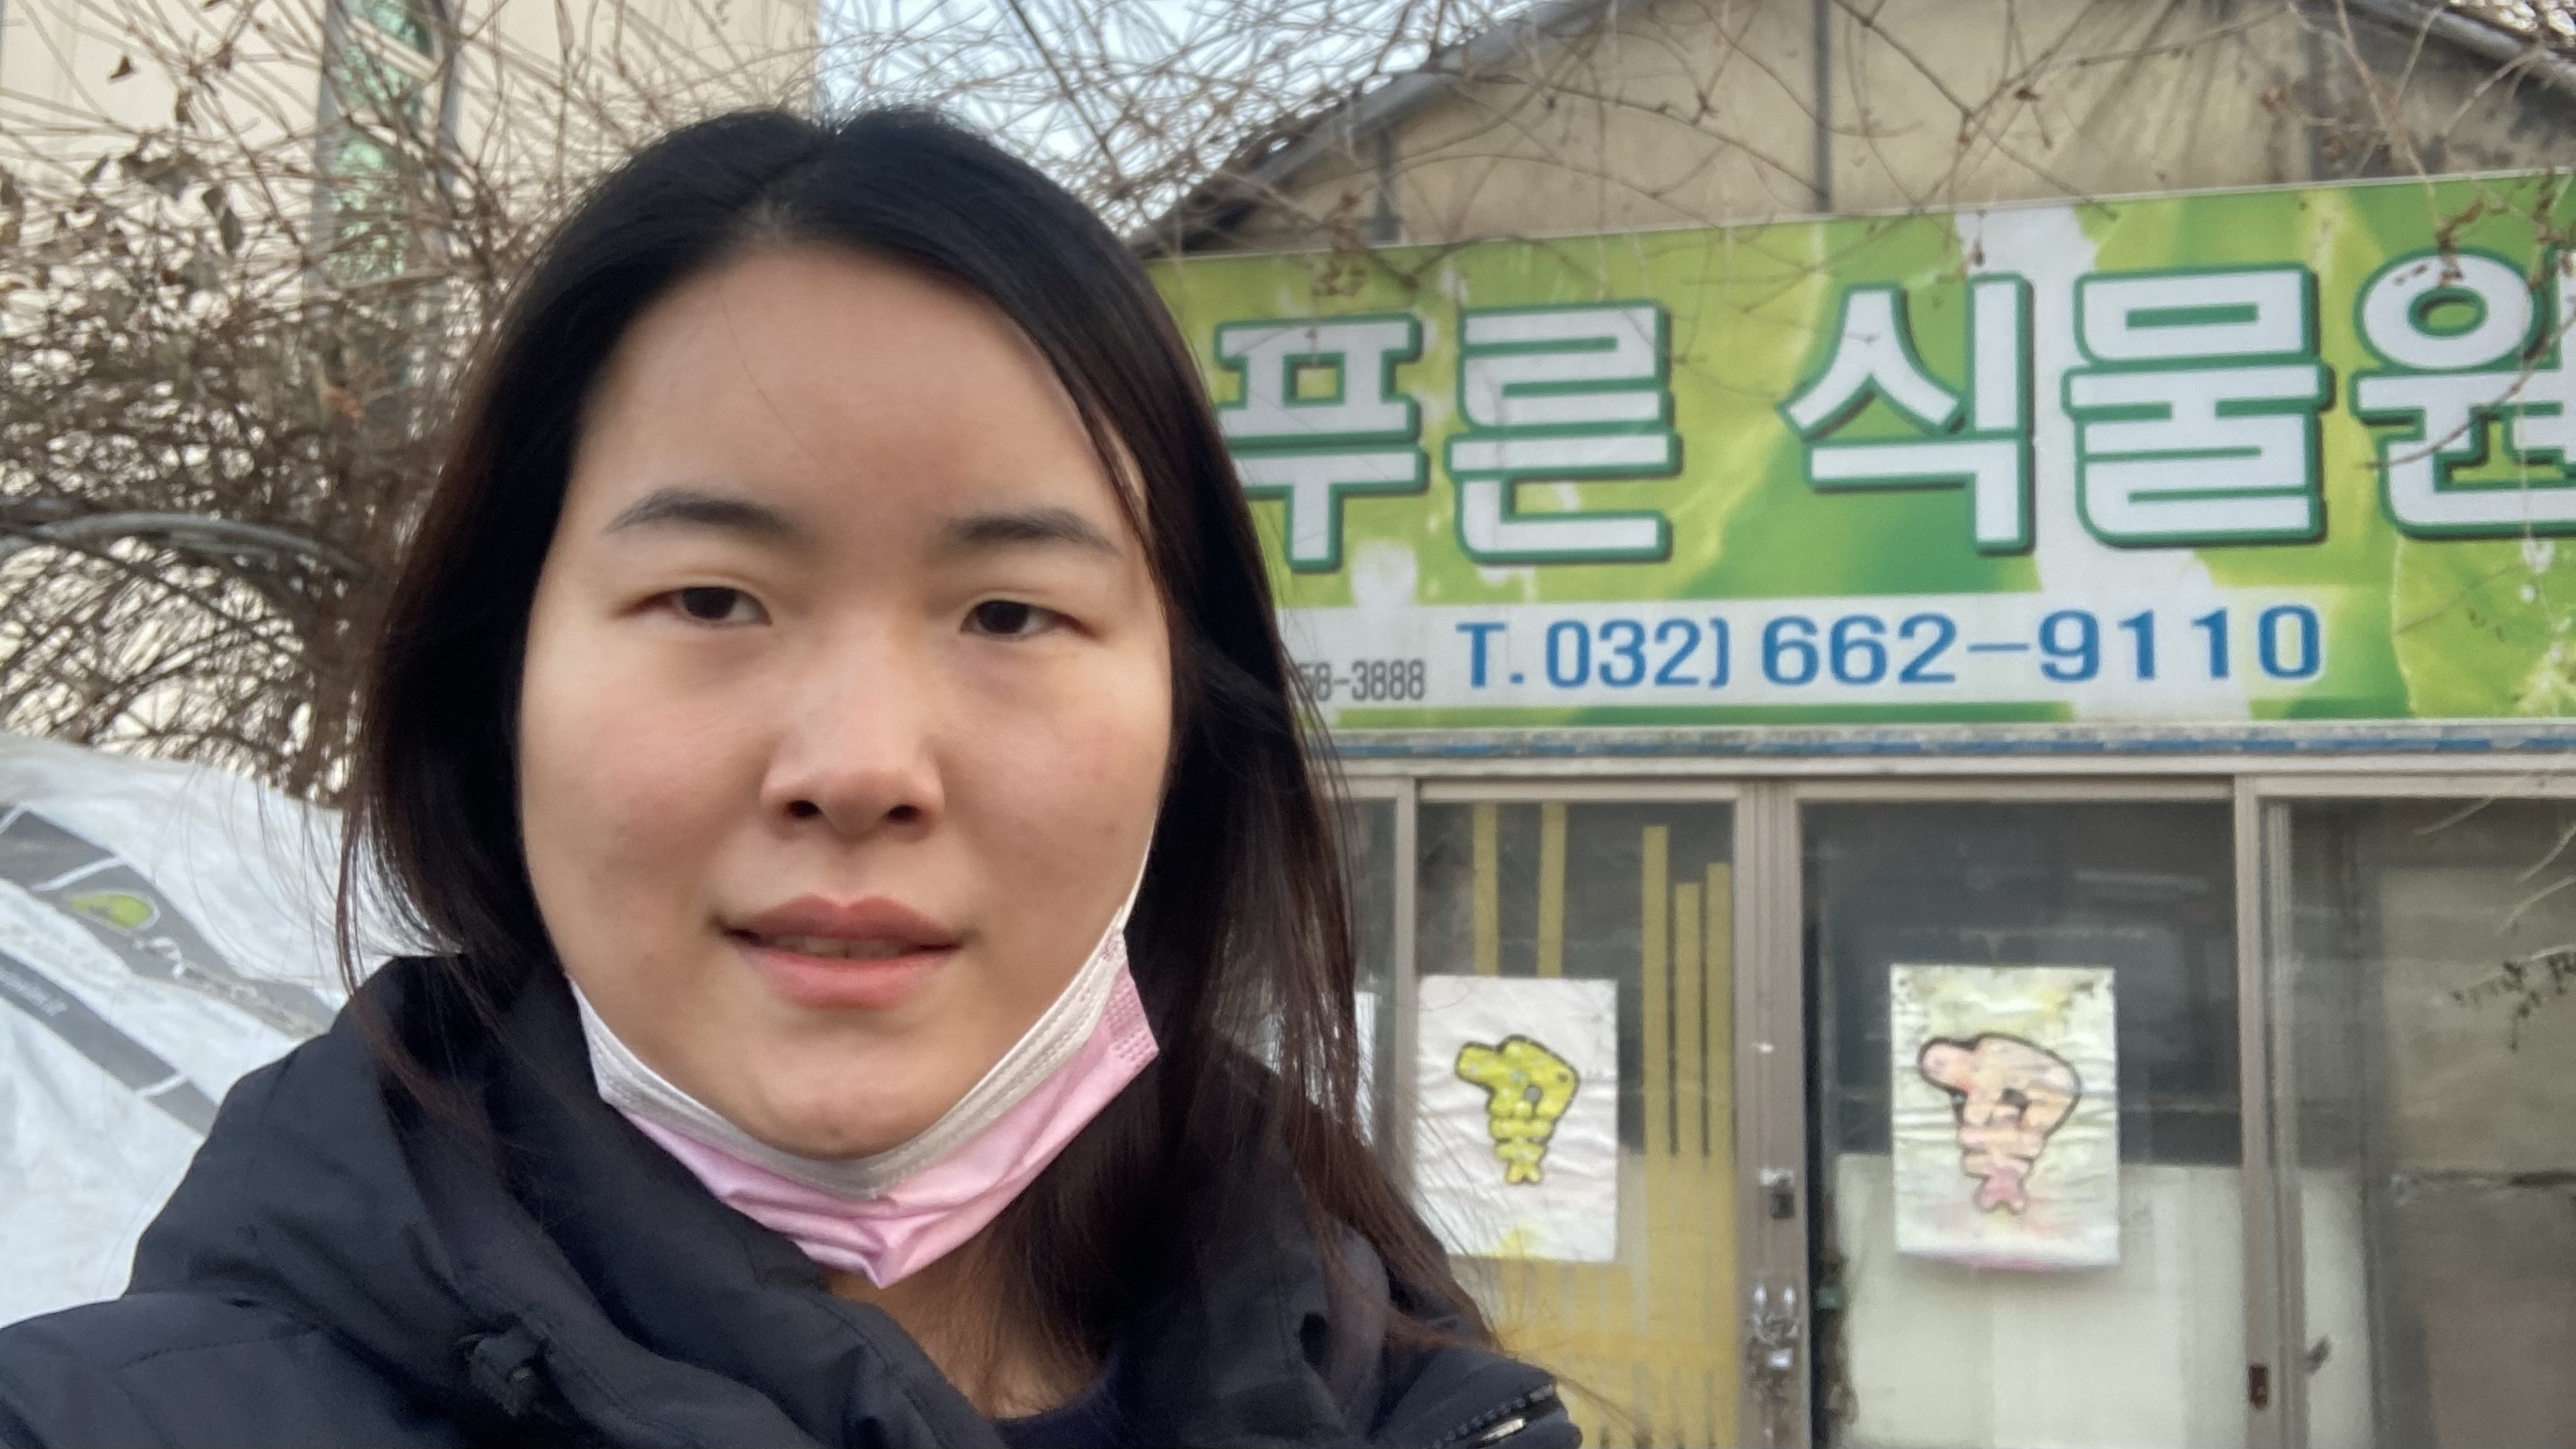

In [ ]:
img_path = "/content/train_combined/anger_3hww73b70615461a7336d0383b53582f8bf804f6e0f30d64f36fb410038b82m2u.jpg"
display(Image(filename=img_path))



---



In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

def is_upside_down(img_path):
    img = cv2.imread(img_path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = face_mesh.process(rgb)

    if result.multi_face_landmarks:
        face = result.multi_face_landmarks[0]
        landmarks = [(lm.x, lm.y) for lm in face.landmark]
        # 눈(33), 입(13)의 y좌표를 비교
        eye_y = landmarks[33][1]
        mouth_y = landmarks[13][1]
        return mouth_y < eye_y  # 입이 눈보다 위에 있으면 뒤집힌 것
    return False

In [ ]:
import os
from tqdm import tqdm

image_dir = "/content/train_combined"
upside_down_images = []

for fname in tqdm(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, fname)
    try:
        if is_upside_down(img_path):
            upside_down_images.append(img_path)
    except:
        continue  # 얼굴이 없거나 오류가 날 경우 패스

print(f"뒤집힌 이미지 수: {len(upside_down_images)}")
for img in upside_down_images[:5]:
    print(img)

100%|██████████| 5996/5996 [10:56<00:00,  9.13it/s]

뒤집힌 이미지 수: 0
